In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from knn import KNN

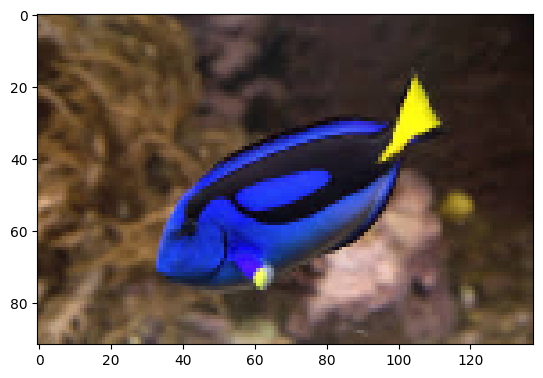

In [4]:
dory = cv2.imread("input/dory.jpg")
dory = cv2.resize(dory, (0, 0), fx=0.5, fy=0.5)
dory = cv2.cvtColor(dory, cv2.COLOR_BGR2RGB)
plt.imshow(dory)
plt.show()

In [5]:
dory.shape

(92, 138, 3)

In [6]:
pixels_list_rgb = dory.reshape(-1, 3)
pixels_list_rgb.shape

(12696, 3)

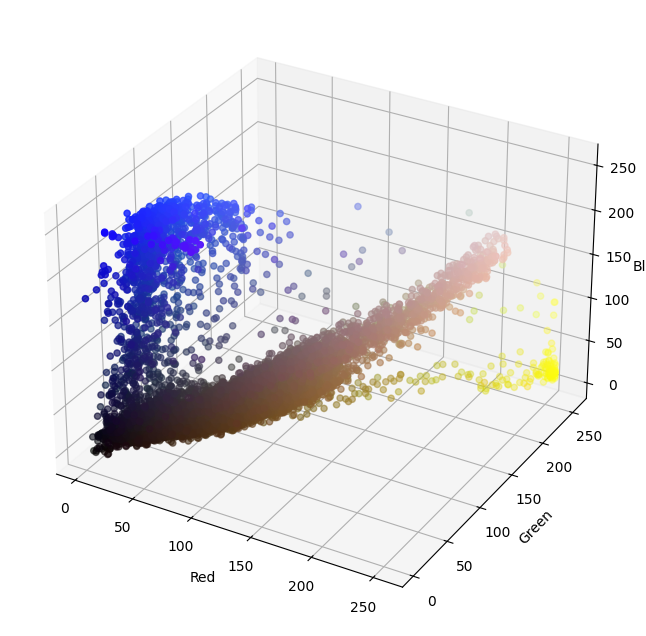

In [7]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(pixels_list_rgb[:, 0], pixels_list_rgb[:, 1], pixels_list_rgb[:, 2], c=pixels_list_rgb / 255)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

In [10]:
dory_hsv = cv2.cvtColor(dory, cv2.COLOR_RGB2HSV)
pixels_list_hsv = dory_hsv.reshape(-1, 3)
pixels_list_hsv

array([[ 16, 109, 126],
       [ 17, 127, 116],
       [ 17, 148, 114],
       ...,
       [ 14,  96, 122],
       [ 16, 118, 108],
       [ 16, 130,  98]], dtype=uint8)

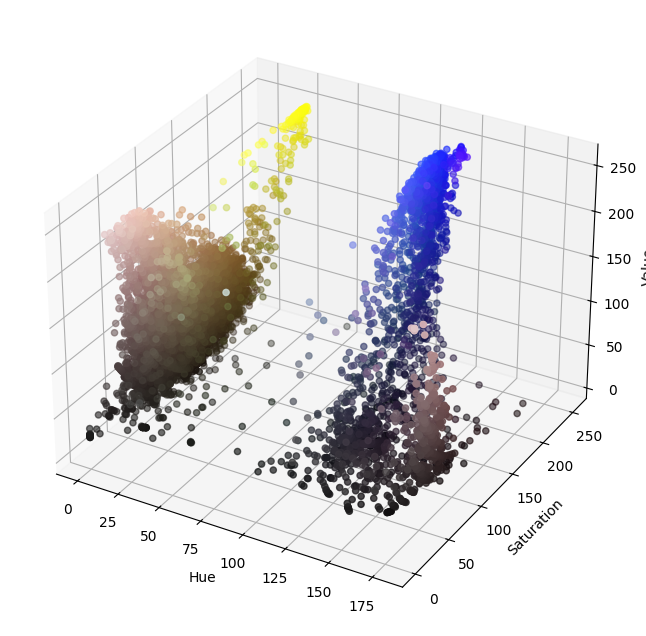

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(pixels_list_hsv[:, 0], pixels_list_hsv[:, 1], pixels_list_hsv[:, 2], c=pixels_list_rgb / 255)
ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')
plt.show()

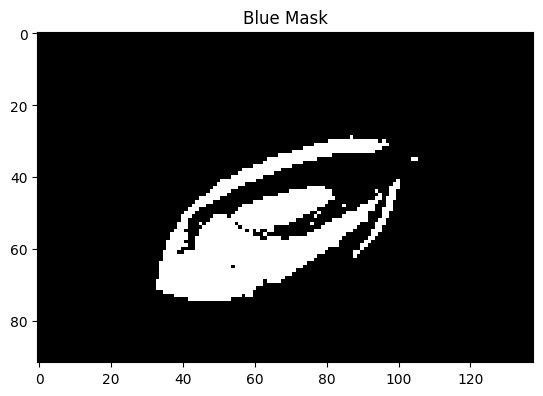

In [12]:
light_blue = (90, 155, 2)
dark_blue = (131, 250, 255)

mask_blue = cv2.inRange(dory_hsv, light_blue, dark_blue)
plt.imshow(mask_blue, cmap='gray')
plt.title("Blue Mask")
plt.show()

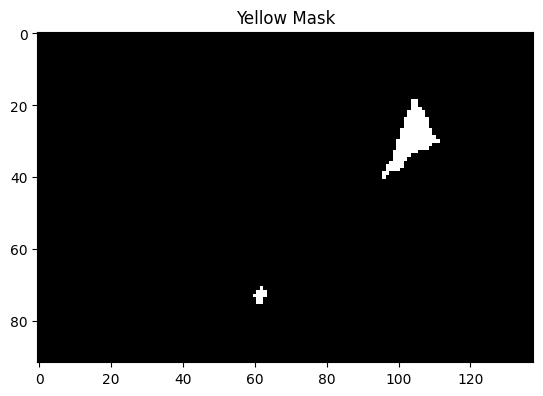

In [13]:
light_yellow = (23, 30, 185)
dark_yellow = (35, 265, 255)

mask_yellow = cv2.inRange(dory_hsv, light_yellow, dark_yellow)
plt.imshow(mask_yellow, cmap='gray')
plt.title("Yellow Mask")
plt.show()

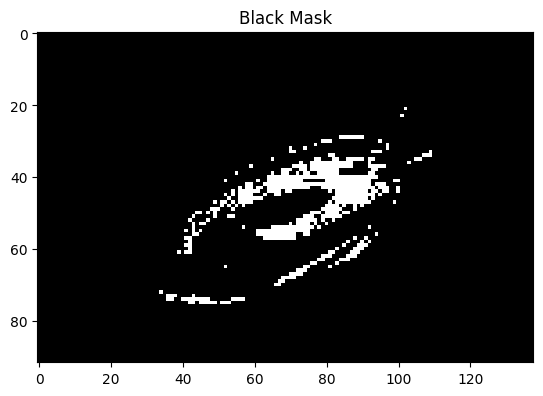

In [32]:
light_black = (110, 55, 0)
dark_black = (140, 190, 90)

mask_black = cv2.inRange(dory_hsv, light_black, dark_black)
plt.imshow(mask_black, cmap='gray')
plt.title("Black Mask")
plt.show()

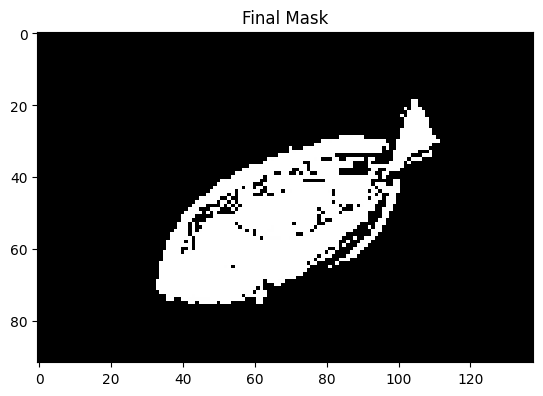

In [38]:
final_mask = mask_blue + mask_yellow + mask_black
plt.imshow(final_mask, cmap='gray')
plt.title("Final Mask")
plt.show()

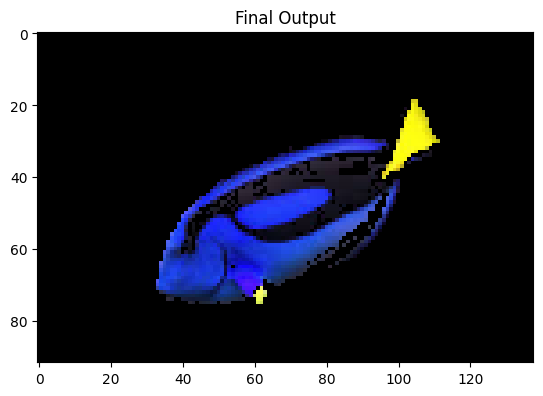

In [37]:
final_result = cv2.bitwise_and(dory, dory, mask=final_mask)
plt.imshow(final_result)
plt.title("Final Output")
plt.show()

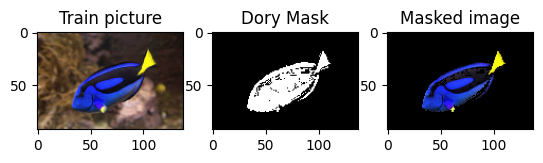

In [39]:
fig,axes=plt.subplots(nrows=1,ncols=3)
ax1,ax2,ax3=axes.flatten()

ax1.imshow(dory,cmap='gray')
ax1.set_title('Train picture')

ax2.imshow(final_mask,cmap='gray')
ax2.set_title('Dory Mask')

ax3.imshow(final_result)
ax3.set_title('Masked image')

plt.show()

Making dataset:

In [40]:
final_mask.shape

(92, 138)

In [41]:
X_train = pixels_list_hsv / 255
y_train = final_mask.reshape(-1, )

In [42]:
knn = KNN(3)
knn.fit(X_train, y_train)

In [43]:
knn.fit(X_train, y_train)

(80, 112, 3)

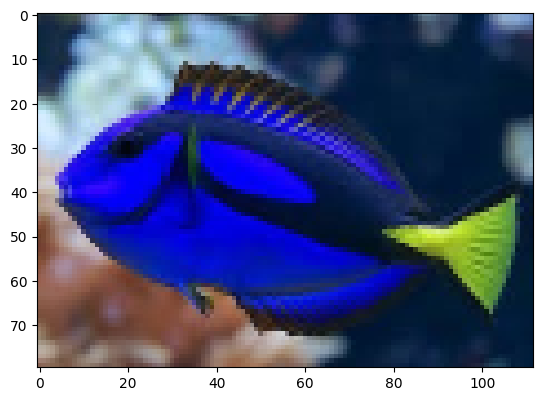

In [ ]:
dory_1 = cv2.imread("input/dory_1.jpg")
dory_1 = cv2.resize(dory_1 , (0,0) , fx=0.5 , fy=0.5)
dory_1 = cv2.cvtColor(dory_1 , cv2.COLOR_BGR2RGB)
dory_1_hsv = cv2.cvtColor(dory_1 , cv2.COLOR_RGB2HSV)
plt.imshow(dory_1, cmap="gray")
dory_1_hsv.shape

In [46]:
X_test = dory_1_hsv.reshape(-1,3) /255
X_test = np.array(X_test)

In [47]:
Y_pred = knn.predict(X_test)

In [48]:
Y_pred = np.array(Y_pred)

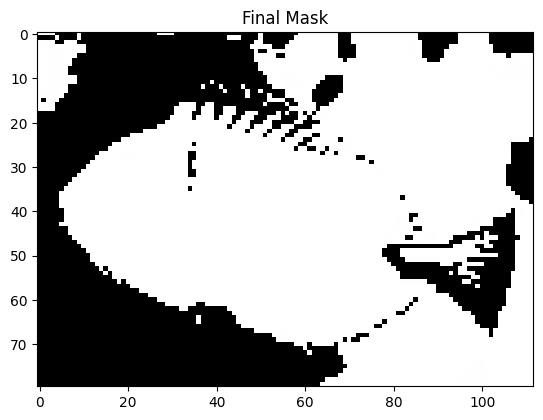

In [52]:
output_1 = Y_pred.reshape(dory_1.shape[:2])
plt.imshow(output_1, cmap='gray')
plt.title("Final Mask")
plt.show()

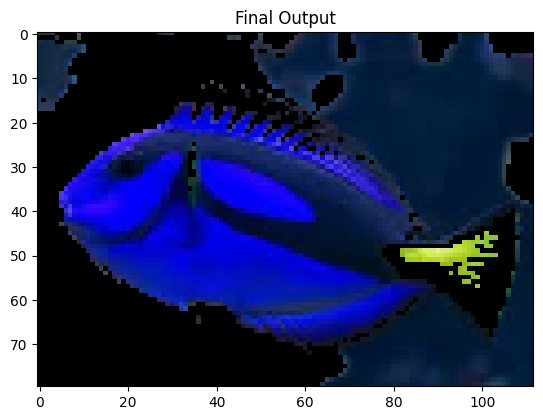

In [54]:
output_1 = output_1.astype("uint8")
final_result_1 = cv2.bitwise_and(dory_1 , dory_1 , mask=output_1)
plt.title("Final Output")
plt.imshow(final_result_1 , cmap="gray")

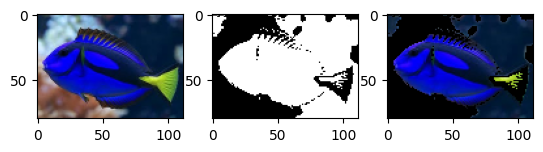

In [55]:
plt.subplot(1, 3, 1)
plt.imshow(dory_1, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(output_1, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(final_result_1)
plt.show()

(72, 105, 3)

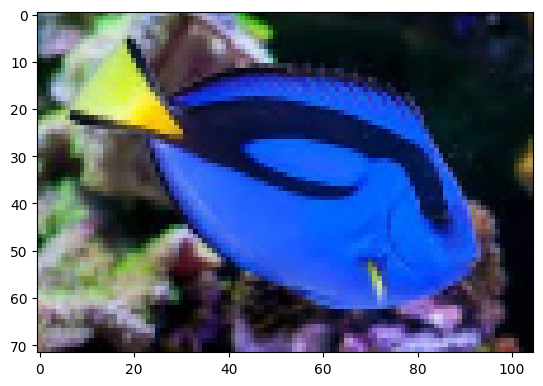

In [65]:
dory_2 = cv2.imread("input/dory_2.jpg")
dory_2 = cv2.resize(dory_2 , (0,0) , fx=0.5 , fy=0.5)
dory_2 = cv2.cvtColor(dory_2 , cv2.COLOR_BGR2RGB)
dory_2_hsv = cv2.cvtColor(dory_2 , cv2.COLOR_RGB2HSV)
plt.imshow(dory_2, cmap="gray")
dory_2_hsv.shape

In [57]:
X_test = dory_2_hsv.reshape(-1,3) /255
X_test = np.array(X_test)

In [58]:
Y_pred = knn.predict(X_test)

In [59]:
Y_pred = np.array(Y_pred)

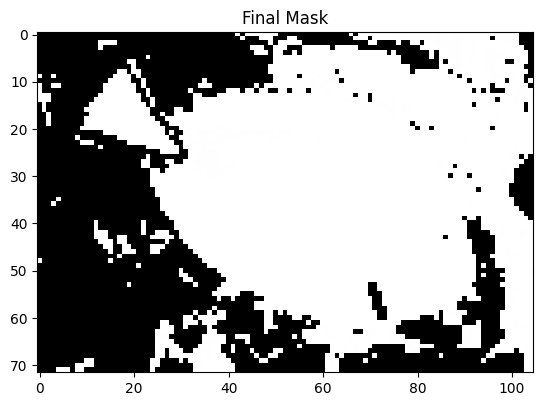

In [70]:
output_2 = Y_pred.reshape(dory_2.shape[:2])
plt.imshow(output_2, cmap='gray')
plt.title("Final Mask")
plt.show()

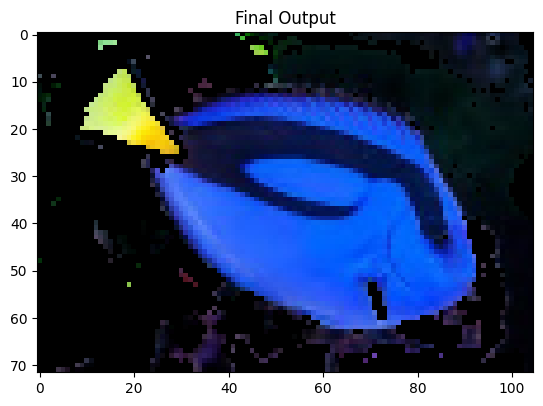

In [62]:
output_2 = output_2.astype("uint8")
final_result_2 = cv2.bitwise_and(dory_2 , dory_2 , mask=output_2)
plt.title("Final Output")
plt.imshow(final_result_2 , cmap="gray")

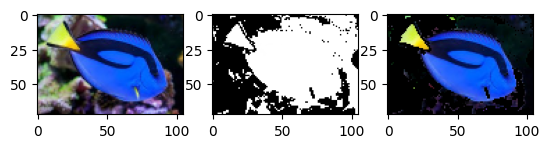

In [63]:
plt.subplot(1, 3, 1)
plt.imshow(dory_2, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(output_2, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(final_result_2)
plt.show()

(92, 100, 3)

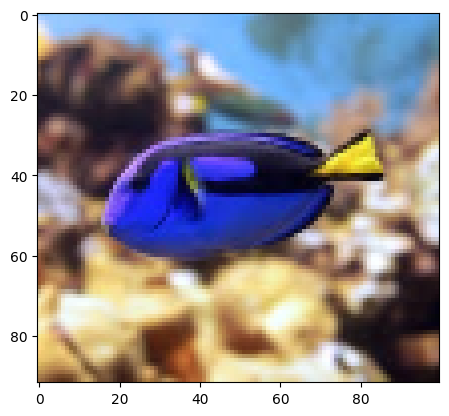

In [64]:
dory_3 = cv2.imread("input/dory_3.jpg")
dory_3 = cv2.resize(dory_3 , (0,0) , fx=0.5 , fy=0.5)
dory_3 = cv2.cvtColor(dory_3 , cv2.COLOR_BGR2RGB)
dory_3_hsv = cv2.cvtColor(dory_3 , cv2.COLOR_RGB2HSV)
plt.imshow(dory_3, cmap="gray")
dory_3_hsv.shape

In [71]:
X_test = dory_3_hsv.reshape(-1,3) /255
X_test = np.array(X_test)

In [72]:
Y_pred = knn.predict(X_test)

In [73]:
Y_pred = np.array(Y_pred)

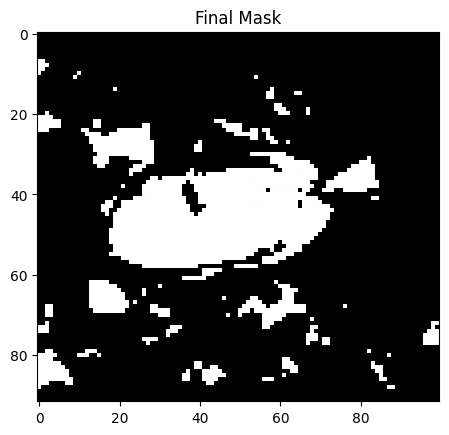

In [74]:
output_3 = Y_pred.reshape(dory_3.shape[:2])
plt.imshow(output_3, cmap='gray')
plt.title("Final Mask")
plt.show()

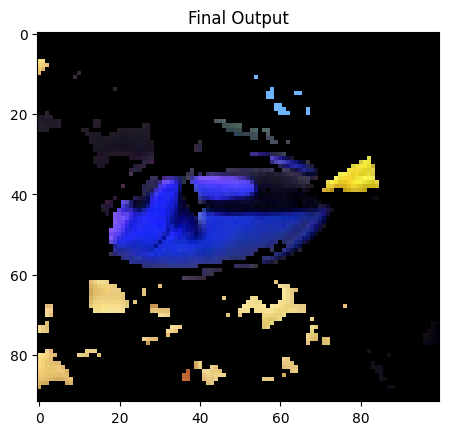

In [75]:
output_3 = output_3.astype("uint8")
final_result_3 = cv2.bitwise_and(dory_3 , dory_3 , mask=output_3)
plt.title("Final Output")
plt.imshow(final_result_3 , cmap="gray")

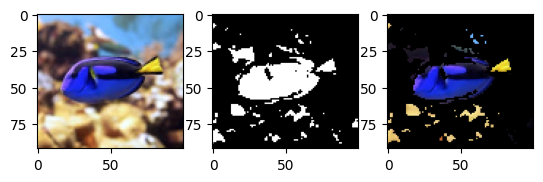

In [76]:
plt.subplot(1, 3, 1)
plt.imshow(dory_3, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(output_3, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(final_result_3)
plt.show()